In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
from utils import *
from Bio import AlignIO
from Bio import Seq
import collections



In [2]:
def getSeq(ID, align):
    for seq in align:
        if ID in seq.id:
            return(seq)
    return('failure')

def seqPosFromAliPos(ID, align,offset):
    seq = getSeq(ID, align)
    mapping = [0]*len(seq)
    j = offset
    for i, res in enumerate(seq.seq):
        if res!='-':
            mapping[i]=j
            j+=1
        else:
            mapping[i]=-1
    return(mapping)

def aliPosFromSeqPos(pos,mapping):
    return(mapping.index(pos))

def getConserved(alignInFile,alignFormat,ID,ref,IDoff,refoff):
    align = AlignIO.read(alignInFile,alignFormat)
    conserved=[]
    seq =getSeq(ID,align)
    refSeq =getSeq(ref,align)
    refNum = seqPosFromAliPos(ref, align,refoff)
    mapping = seqPosFromAliPos(ID, align,IDoff)
    for i in range(align.get_alignment_length()):
        letters = collections.Counter(align[:,i])
#         if ((letters.most_common()[0][0]!='-')&(letters.most_common()[0][1]/len(align[:,i])>0.6)):
        conserved.append({'AAnum dab2':mapping[i]+1,
                          'dab2 AA':seq[i],
                          'dab2 pctID':letters[seq[i]]/len(align[:,i]),
                          'AAnum dab1':refNum[i]+1,
                          'dab1 AA':refSeq[i],
                          'dab1 pctID':letters[refSeq[i]]/len(align[:,i]),
                          'conservedResi':letters.most_common()[0][0],
                          'percent ID':letters.most_common()[0][1]/len(align[:,i])})
    return(np.array(conserved))

In [3]:
infile = "../data/msa/dabB_microbesOnline.clustal"
align = AlignIO.read(infile, "clustal")
print(align)
print('number of proteins in alignment: %d'%len(align))
print()
dabB2 = 'Hneap_0212'
print(getSeq(dabB2,align))
print()
dabB1 = 'Hneap_0909'
print(getSeq(dabB1,align))

SingleLetterAlphabet() alignment with 197 rows and 1614 columns
--------------------------------------------...--- 1163915:1:494:COG-NuoL:SAB0402:NADH
--------------------------------------------...--- 665750:1:494:COG-NuoL:SAR0452:putative
--------------------------------------------...--- 911962:1:494:nuoF:SACOL0494:NADH
--------------------------------------------...--- 6212222:1:494:COG-NuoL:SauraJK_010100008930:NADH
--------------------------------------------...--- 6213482:1:494:COG-NuoL:SauraJ_010100001606:NADH
--------------------------------------------...--- 1291940:1:494:COG-NuoL:SAUSA300_0425:NADH
--------------------------------------------...--- 3773960:1:494:COG-NuoL:USA300HOU_0457:NADH
--------------------------------------------...--- 1288892:1:494:COG-NuoL:SAOUHSC_00412:NADH
--------------------------------------------...--- 3705949:1:494:ndhF:NWMN_0418:NADH
--------------------------------------------...--- 260621:1:494:ndhF:VIMSS260621:NADH
-------------------------

[{'AAnum dab2': 125, 'dab2 AA': 'Y', 'dab2 pctID': 0.9238578680203046, 'AAnum dab1': 104, 'dab1 AA': 'Y', 'dab1 pctID': 0.9238578680203046, 'conservedResi': 'Y', 'percent ID': 0.9238578680203046}
 {'AAnum dab2': 162, 'dab2 AA': 'I', 'dab2 pctID': 0.005076142131979695, 'AAnum dab1': 141, 'dab1 AA': 'W', 'dab1 pctID': 0.934010152284264, 'conservedResi': 'W', 'percent ID': 0.934010152284264}
 {'AAnum dab2': 172, 'dab2 AA': 'L', 'dab2 pctID': 0.949238578680203, 'AAnum dab1': 151, 'dab1 AA': 'L', 'dab1 pctID': 0.949238578680203, 'conservedResi': 'L', 'percent ID': 0.949238578680203}
 {'AAnum dab2': 252, 'dab2 AA': 'P', 'dab2 pctID': 0.9238578680203046, 'AAnum dab1': 235, 'dab1 AA': 'P', 'dab1 pctID': 0.9238578680203046, 'conservedResi': 'P', 'percent ID': 0.9238578680203046}
 {'AAnum dab2': 256, 'dab2 AA': 'W', 'dab2 pctID': 0.9593908629441624, 'AAnum dab1': 239, 'dab1 AA': 'W', 'dab1 pctID': 0.9593908629441624, 'conservedResi': 'W', 'percent ID': 0.9593908629441624}
 {'AAnum dab2': 257, 'd

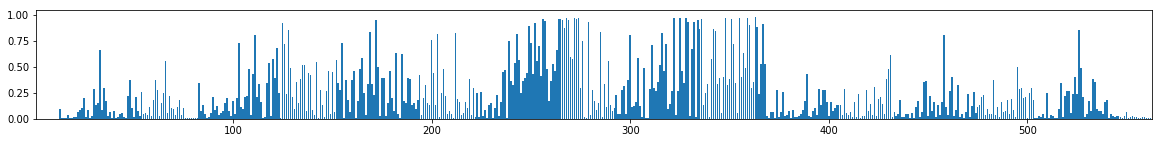

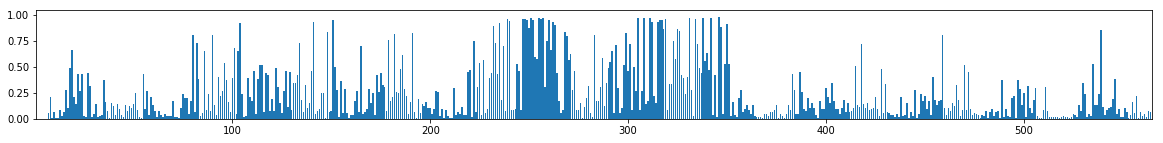

In [4]:
identity = getConserved(infile,'clustal',dabB2,dabB1,12,6)
# goodResi = {351,353,524,539}
ninteypct = identity[[(x['percent ID']>0.9) & (x['conservedResi'] != '-') for x in identity]]
print(ninteypct)
conserve_df = pd.DataFrame.from_records(identity)
conserve_df=conserve_df.sort_values('AAnum dab2')
goodResi = {-10}
conserve_df['active_site'] = conserve_df['percent ID']*conserve_df['AAnum dab2'].isin(goodResi)


plt.figure(figsize=(20,2))
plt.bar(conserve_df['AAnum dab2'],conserve_df['dab2 pctID'])
# active_site = conserve_df[conserve_df['AAnum dabA2'].isin(goodResi)]
# plt.bar(active_site['AAnum dab2'],active_site['percent ID'],color = 'r')
plt.xlim(1,max(conserve_df['AAnum dab2']))
plt.show()

plt.figure(figsize=(20,2))
plt.bar(conserve_df['AAnum dab1'],conserve_df['dab1 pctID'])
# active_site = conserve_df[conserve_df['AAnum dabA2'].isin(goodResi)]
# plt.bar(active_site['AAnum dab2'],active_site['percent ID'],color = 'r')
plt.xlim(1,max(conserve_df['AAnum dab1']))
plt.show()

conserve_df.to_csv(infile+'.csv')

In [5]:
infile = "../data/msa/PF10070_ncbi.txt"
align = AlignIO.read(infile, "fasta")
print(align)
print('number of proteins in alignment: %d'%len(align))
dabA2 = 'WP_012823110'
print(getSeq(dabA2,align))
dabA1 = 'WP_012823786'
print(getSeq(dabA1,align))

SingleLetterAlphabet() alignment with 4781 rows and 1980 columns
VQLAGEVIAQYWPMR-TFIHHNPLHGL--E-SLPFEQAVQ---H...GWV WP_053380624/21-1043
VELAGEAISSYWPMR-TFIHHNPLHGL--E-ELPFGPAVK---R...EWV WP_013248325/20-1048
VELAGEAISSYWPMR-TFIHHNPLHGL--E-DLPFGQAVK---R...EWV WP_080878007/20-1048
-QLAGECVSQYWPMR-TFIHHNPLHGL--E-GMPFELAVE---H...GWI OYT20765/23-1041
-QLAGECVSQYWPMR-TFIHHNPLHGL--E-RMPFELAVE---H...GWI WP_090744791/23-1041
-RVAGEITGTYWPMR-TFIHHNPLHGL--E-ELPFHDAIQ---R...EWV WP_083448025/25-1065
-KLASESVAPYWPMR-TFIHHNPLHEL--E-SRSFHEAVQ---R...RWV OLE42792/18-1077
VQMAGEPIPFFWPMR-TFIHHNPLHGL--E-HMPFEQATT---E...GWI WP_081662595/15-1000
-KLASESVAPYWPMR-TFIHHNPLHEL--E-SRSFHEAVQ---R...RWV OLC41483/18-1077
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL OYT24854/43-1071
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL SLM42748/24-1052
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL WP_080878002/43-1071
VNLAGETISYFWPMK-TFIHHNPLHGL--E-EMSFEKAIK---E...QWI WP_005005277/24-1058
VNLAGEVVARLWPMR-TFI

[{'AAnum dab2': 229, 'dab2 AA': 'G', 'dab2 pctID': 0.9205187199330684, 'AAnum dab1': 268, 'dab1 AA': 'G', 'dab1 pctID': 0.9205187199330684, 'conservedResi': 'G', 'percent ID': 0.9205187199330684}
 {'AAnum dab2': 230, 'dab2 AA': 'W', 'dab2 pctID': 0.9117339468730391, 'AAnum dab1': 269, 'dab1 AA': 'W', 'dab1 pctID': 0.9117339468730391, 'conservedResi': 'W', 'percent ID': 0.9117339468730391}
 {'AAnum dab2': 351, 'dab2 AA': 'C', 'dab2 pctID': 0.9192637523530642, 'AAnum dab1': 462, 'dab1 AA': 'C', 'dab1 pctID': 0.9192637523530642, 'conservedResi': 'C', 'percent ID': 0.9192637523530642}
 {'AAnum dab2': 353, 'dab2 AA': 'D', 'dab2 pctID': 0.9186362685630621, 'AAnum dab1': 464, 'dab1 AA': 'D', 'dab1 pctID': 0.9186362685630621, 'conservedResi': 'D', 'percent ID': 0.9186362685630621}
 {'AAnum dab2': 355, 'dab2 AA': 'R', 'dab2 pctID': 0.9190545910897302, 'AAnum dab1': 466, 'dab1 AA': 'R', 'dab1 pctID': 0.9190545910897302, 'conservedResi': 'R', 'percent ID': 0.9190545910897302}
 {'AAnum dab2': 360,

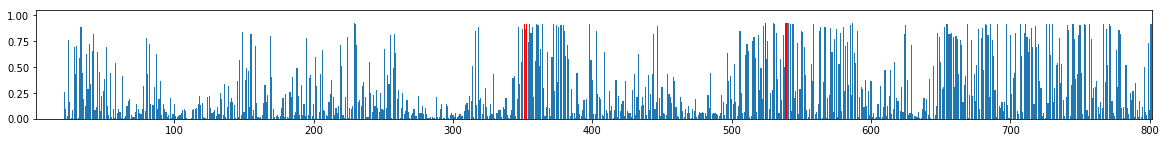

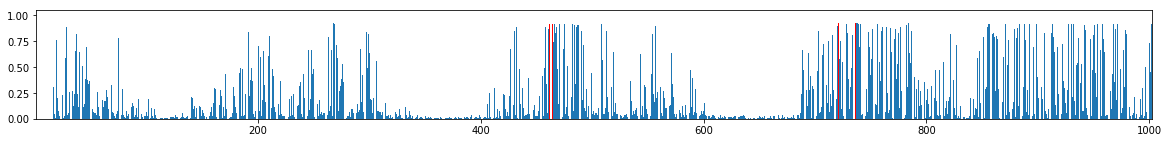

In [7]:
identity = getConserved(infile,'fasta',dabA2,dabA1,20,15)
goodResi = {351,353,524,539}
ninteypct = identity[[(x['percent ID']>0.9) & (x['conservedResi'] != '-') for x in identity]]
print(ninteypct)

conserve_df = pd.DataFrame.from_records(identity)
conserve_df=conserve_df.sort_values('AAnum dab2')
plt.figure(figsize=(20,2))
plt.bar(conserve_df['AAnum dab2'],conserve_df['dab2 pctID'])
goodResi = {351,353,524,539}
conserve_df['active_siteD1'] = conserve_df['dab1 pctID']*conserve_df['AAnum dab2'].isin(goodResi)
conserve_df['active_siteD2'] = conserve_df['dab2 pctID']*conserve_df['AAnum dab2'].isin(goodResi)

plt.bar(conserve_df['AAnum dab2'],conserve_df['active_siteD2'],color = 'r')
plt.xlim(1,max(conserve_df['AAnum dab2']))
plt.show()

plt.figure(figsize=(20,2))
plt.bar(conserve_df['AAnum dab1'],conserve_df['dab1 pctID'])
plt.bar(conserve_df['AAnum dab1'],conserve_df['active_siteD1'],color = 'r')
plt.xlim(1,max(conserve_df['AAnum dab1']))
plt.show()

conserve_df.to_csv(infile+'.csv')